In [1]:
%matplotlib notebook
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
import scipy.cluster.hierarchy as shc
import csv
import pickle

In [2]:
drugs  = './Screened_Compounds.csv'
drugs  = pd.read_csv(drugs)

drugsData = './target.csv'
drugsData = pd.read_csv(drugsData, header = 0)

drugs_filtered  = '/home/ewa/Projekt/drugs_data.csv'
drugs_filtered  = pd.read_csv(drugs_filtered)

In [19]:
drugsData.rename(columns={'Unnamed: 0': 'Name'},inplace=True)

In [20]:
drugsData.isnull().values.any()

False

In [21]:
'''Get interesting pathways'''
drugs = drugs.loc[:,["Drug ID","Drug Name","Target Pathway"]]
drugs_filtered = pd.merge(drugs_filtered , drugs,left_on = "Small Molecule", right_on = "Drug ID")


AttributeError: 'Series' object has no attribute 'value'

In [23]:
pathways = drugs_filtered['Target Pathway'].values

In [24]:
'''add target pathway'''
drugs = drugs.loc[:,["Drug ID","Drug Name","Target Pathway"]]
drugs_path = pd.merge(drugsData , drugs,left_on = "Name", right_on = "Drug Name")
drugs_path = drugs_path.loc[:, drugs_path.columns != "Name"]
drugs_path=drugs_path.loc[drugs_path['Target Pathway'].isin(pathways)]
drugs_path.reset_index(drop=True, inplace=True)


In [61]:
colors = ['#25CC32',
     '#65105A',
     '#2118C7',
     '#2F493E',
     '#F9F405',
     '#5DAC9D',
     '#E02861',
     '#657AF5',
     '#B8FC09',
     '#6D2AF4',
     '#799A19',
     '#B19960',
     '#5A6C6E']

pathways = drugs_path["Target Pathway"].unique()

In [59]:
len(pathways)

13

In [66]:
#PCA
x = drugs_path.drop(['Drug ID', 'Target Pathway','Drug Name'], axis = 1).values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components = 2)
drugs_transformed_pca = pca.fit_transform(x)
drugs_transformed = pd.DataFrame(data = drugs_transformed_pca
              , columns = ['principal component 1', 'principal component 2'])
drugs_PCA = pd.concat([drugs_transformed, drugs_path[['Target Pathway']]], axis = 1)
drugs_PCA=drugs_PCA.loc[(drugs_PCA['principal component 1']<5) & (drugs_PCA['principal component 2']<25)]

pca = PCA(n_components = 50)
drugs_transformed_pca = pca.fit_transform(x)
drugs_transformed = pd.DataFrame(data = drugs_transformed_pca
             , columns = list(map(lambda x : 'principal component ' + str(x), range(1,51))))

tsne = TSNE(n_components = 2)
drugs_ttransformed = tsne.fit_transform(drugs_transformed)
drugs_ttransformed = pd.DataFrame(data = drugs_ttransformed
             , columns = ['component 1', 'component 2'])
drugs_tsne = pd.concat([drugs_ttransformed, drugs_path[['Target Pathway']]], axis = 1)

<IPython.core.display.Javascript object>


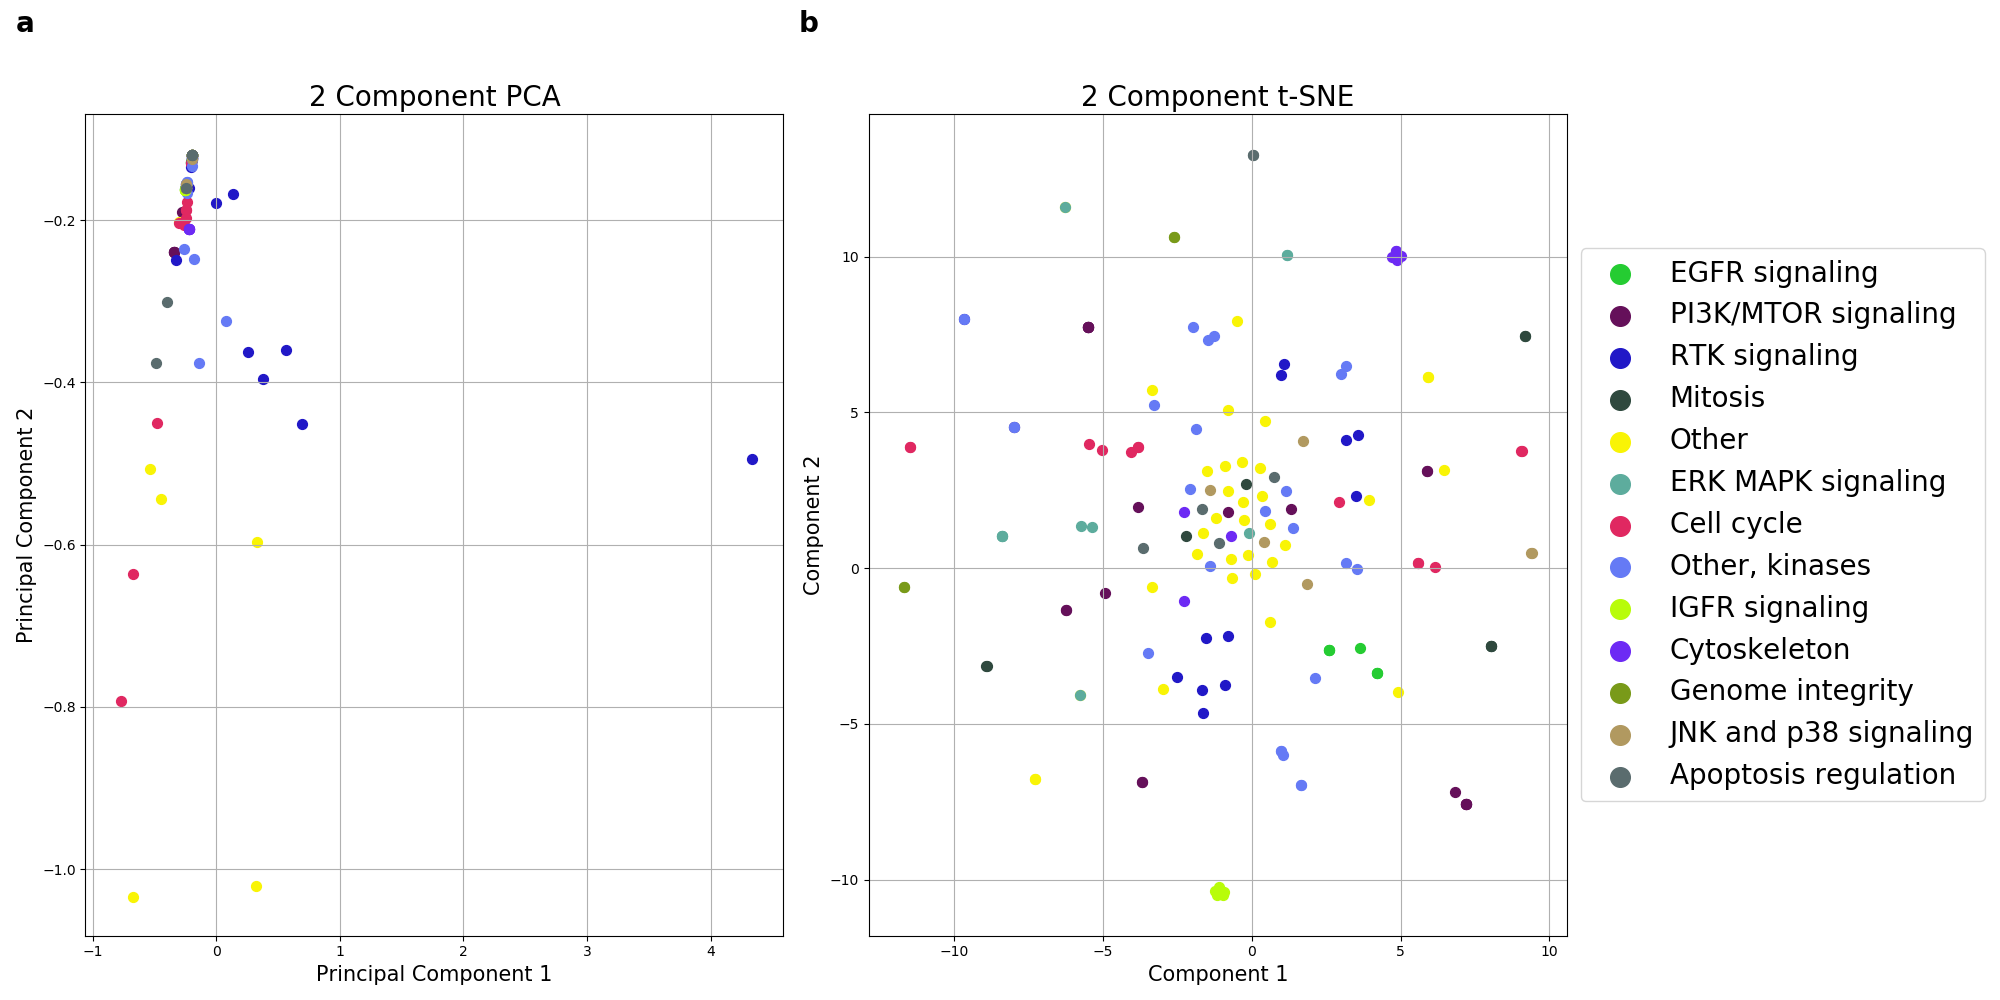

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))


ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


for pathway, color in zip(pathways,colors):
    indicesToKeep = drugs_PCA['Target Pathway'] == pathway
    ax1.scatter(drugs_PCA.loc[indicesToKeep, 'principal component 1']
               ,drugs_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, 
            size=20, weight='bold')
#ax1.legend(category,loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid()



ax2.set_xlabel('Component 1', fontsize = 15)
ax2.set_ylabel('Component 2', fontsize = 15)
ax2.set_title('2 Component t-SNE', fontsize = 20)


for pathway, color in zip(pathways,colors):
    indicesToKeep = drugs_tsne['Target Pathway'] == pathway
    ax2.scatter(drugs_tsne.loc[indicesToKeep, 'component 1']
               ,drugs_tsne.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
    
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, 
            size=20, weight='bold')
ax2.legend(pathways,loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20, markerscale = 2)

ax2.grid()
plt.tight_layout()
plt.savefig('PCA_T-sne.pdf')

In [69]:
#Cell lines
SNP  = './SNP_CNV.csv'
SNP  = pd.read_csv(SNP)

Progeny = './progeny11.csv'
Progeny= pd.read_csv(Progeny, header = 0)

tissue  = './tissue_label_gdsc_ID.csv'
tissue  = pd.read_csv(tissue)


In [77]:
SNP.rename(columns={'Unnamed: 0': 'Cell line ID'},inplace=True)
Progeny.rename(columns={'Unnamed: 0': 'Cell line ID'},inplace=True)
tissue.rename(columns={'Unnamed: 0': 'Cell line ID'},inplace=True)

In [79]:
tissue = tissue.loc[:,["tissue","CosmicID"]]
SNP = pd.merge(SNP , tissue,left_on = "Cell line ID", right_on = "CosmicID")
SNP = SNP.loc[:, SNP.columns != "CosmicID"]
SNP.reset_index(drop=True, inplace=True)

In [81]:
Progeny = pd.merge(Progeny, tissue,left_on = "Cell line ID", right_on = "CosmicID")
Progeny = Progeny.loc[:, Progeny.columns != "CosmicID"]
Progeny.reset_index(drop=True, inplace=True)

In [83]:
colors = ['plum',
 'lightcoral',
 'skyblue',
 'darkviolet',
 'cornsilk',
 'lightgray',
 'floralwhite',
 'grey',
 'thistle',
 'silver',
 'sandybrown',
 'mediumseagreen',
 'dimgray',
 'mediumaquamarine',
 'darkseagreen',
 'deepskyblue',
 'darkkhaki',
 'lightsalmon',
 'moccasin',
 'firebrick',
 'rebeccapurple',
 'lightslategray',
 'lightsteelblue',
 'darkorange',
 'mediumspringgreen',
 'lavender',
 'linen',
 'green',
 'darkblue']
tissues = SNP["tissue"].unique()
N=len(tissues)

In [98]:
import matplotlib.colors as pltc
from random import sample
all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors, N)

In [85]:
y = SNP.drop(['Cell line ID', 'tissue'], axis = 1).values
y = StandardScaler().fit_transform(y)

pca = PCA(n_components = 2)
cells_transformed_pca = pca.fit_transform(y)
cells_transformed = pd.DataFrame(data = cells_transformed_pca
             , columns = ['principal component 1', 'principal component 2'])
cells_PCA = pd.concat([cells_transformed,SNP[['tissue']]], axis = 1)

tsne = TSNE(n_components = 2)
cells_ttransformed = tsne.fit_transform(SNP.drop(['Cell line ID', 'tissue'], axis = 1))
cells_ttransformed = pd.DataFrame(data = cells_ttransformed
             , columns = ['component 1', 'component 2'])
cells_tsne = pd.concat([cells_ttransformed, SNP[['tissue']]], axis = 1)

<IPython.core.display.Javascript object>


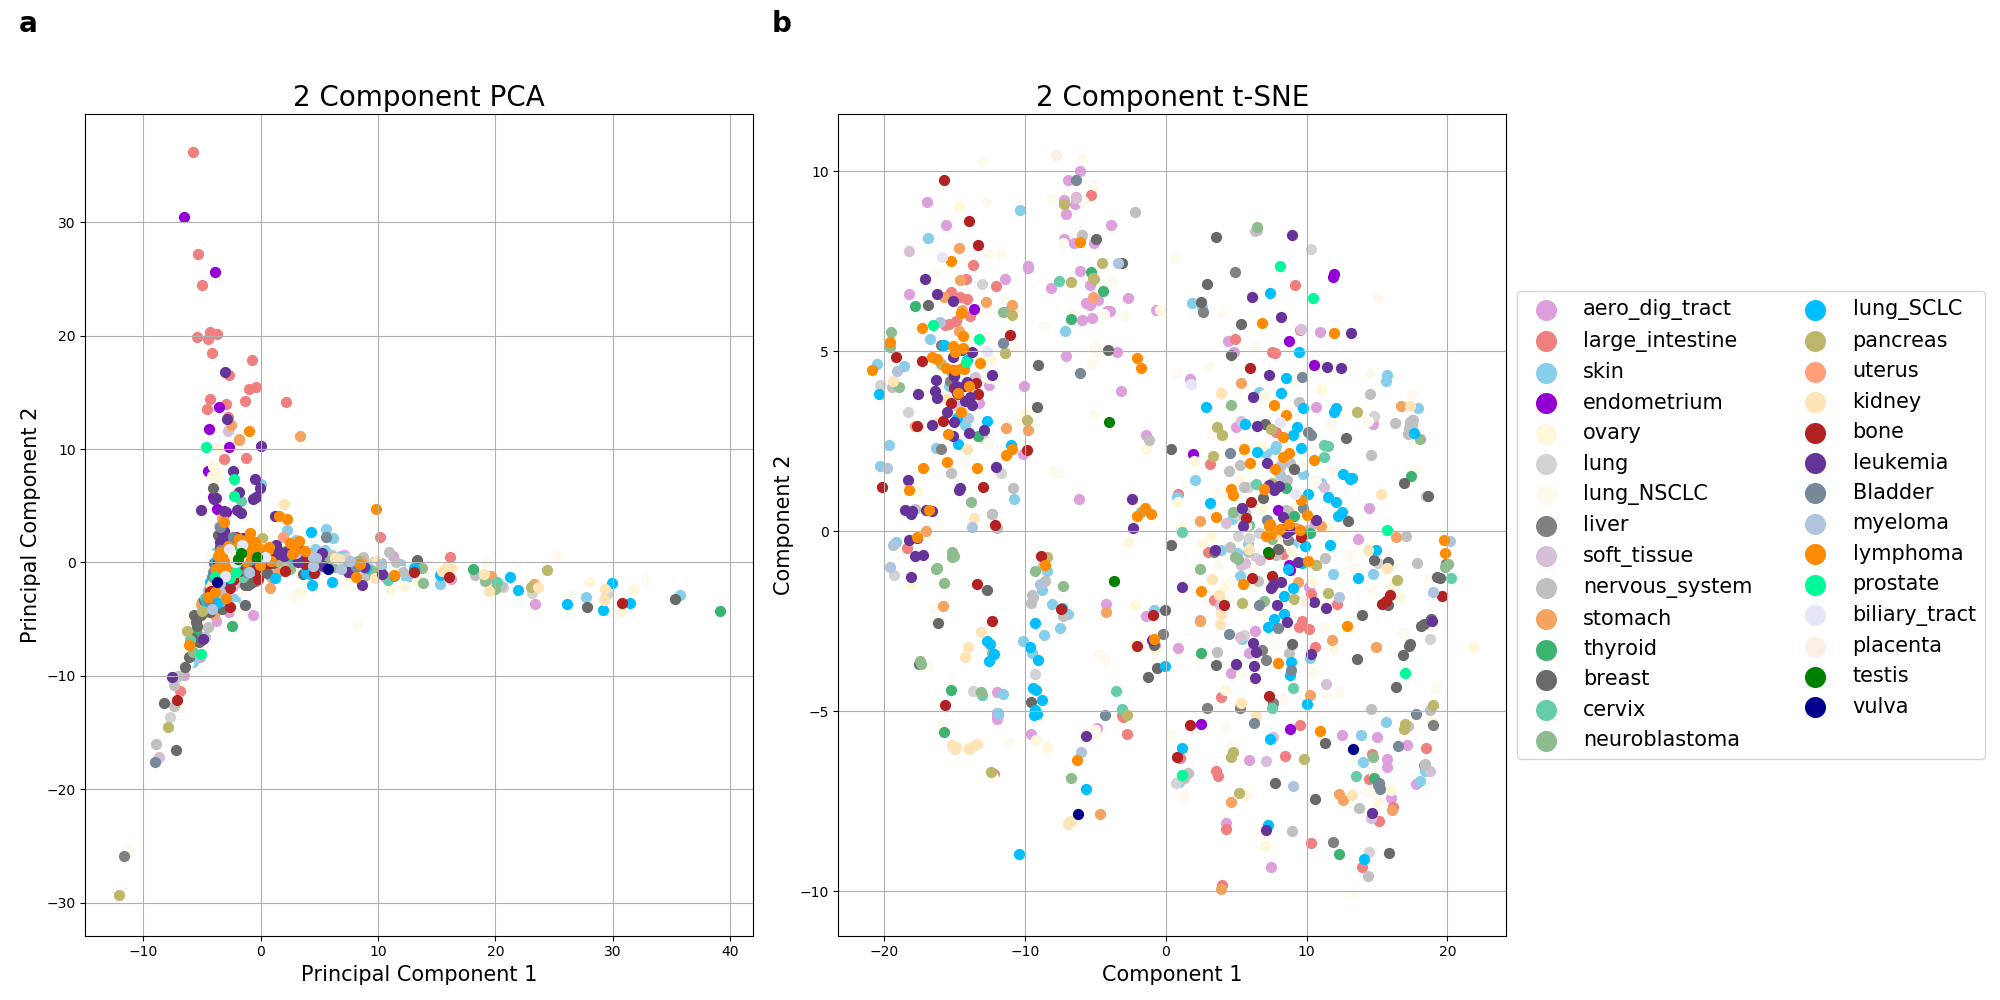

In [103]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))


ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


for tissue, color in zip(tissues,colors):
    indicesToKeep = cells_PCA['tissue'] == tissue
    ax1.scatter(cells_PCA.loc[indicesToKeep, 'principal component 1']
               ,cells_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, 
            size=20, weight='bold')
#ax1.legend(category,loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid()



ax2.set_xlabel('Component 1', fontsize = 15)
ax2.set_ylabel('Component 2', fontsize = 15)
ax2.set_title('2 Component t-SNE', fontsize = 20)


for tissue, color in zip(tissues,colors):
    indicesToKeep = cells_tsne['tissue'] == tissue
    ax2.scatter(cells_tsne.loc[indicesToKeep, 'component 1']
               ,cells_tsne.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
    
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, 
            size=20, weight='bold')
ax2.legend(tissues,loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 15, markerscale = 2,ncol=2)

ax2.grid()
plt.tight_layout()
plt.savefig('cells_PCA_T-sne.pdf')

In [108]:
pca = PCA(n_components = 50)
cells_transformed_pca = pca.fit_transform(y)
cells_transformed = pd.DataFrame(data = cells_transformed_pca
             , columns = list(map(lambda x : 'principal component ' + str(x), range(1,51))))

tsne = TSNE(n_components = 2)
cells_ttransformed = tsne.fit_transform(cells_transformed)
cells_ttransformed = pd.DataFrame(data = cells_ttransformed
             , columns = ['component 1', 'component 2'])
cells_tsne = pd.concat([cells_ttransformed, SNP[['tissue']]], axis = 1)

<IPython.core.display.Javascript object>


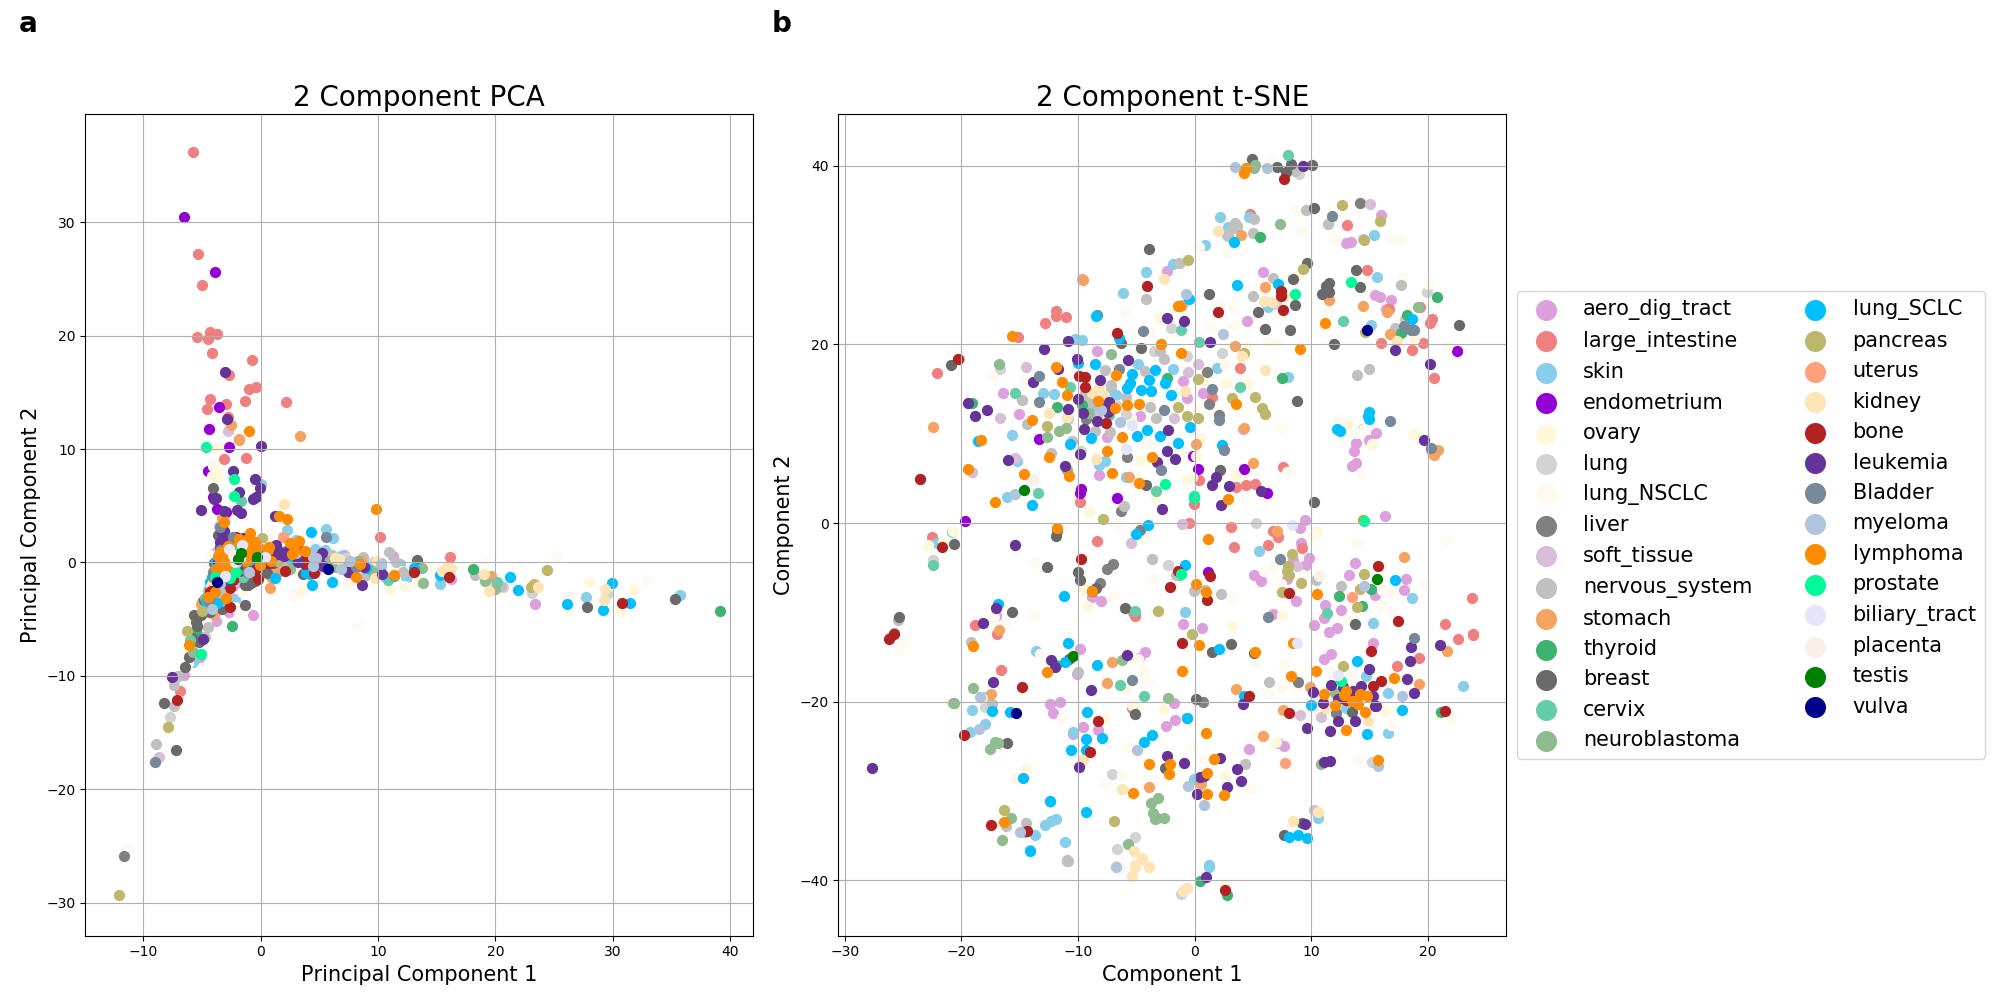

In [109]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))


ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


for tissue, color in zip(tissues,colors):
    indicesToKeep = cells_PCA['tissue'] == tissue
    ax1.scatter(cells_PCA.loc[indicesToKeep, 'principal component 1']
               ,cells_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, 
            size=20, weight='bold')
#ax1.legend(category,loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid()



ax2.set_xlabel('Component 1', fontsize = 15)
ax2.set_ylabel('Component 2', fontsize = 15)
ax2.set_title('2 Component t-SNE', fontsize = 20)


for tissue, color in zip(tissues,colors):
    indicesToKeep = cells_tsne['tissue'] == tissue
    ax2.scatter(cells_tsne.loc[indicesToKeep, 'component 1']
               ,cells_tsne.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
    
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, 
            size=20, weight='bold')
ax2.legend(tissues,loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 15, markerscale = 2,ncol=2)

ax2.grid()
plt.tight_layout()
plt.savefig('cells_PCA_T-sne_50.pdf')

In [119]:
top_15_tissue=SNP['tissue'].value_counts()[:15].index.values

In [122]:
SNP_filtered=SNP.loc[SNP['tissue'].isin(top_15_tissue)]

In [136]:
colors = ['red','orange','green','yellow','blue','pink','black','grey','purple','plum','lightgreen',
         'magenta','brown','midnightblue','gold']
tissues = SNP_filtered["tissue"].unique()
all_colors = [k for k,v in pltc.cnames.items()]
N=len(tissues)
#colors = sample(all_colors, N)

In [126]:
y = SNP_filtered.drop(['Cell line ID', 'tissue'], axis = 1).values
y = StandardScaler().fit_transform(y)

pca = PCA(n_components = 2)
cells_transformed_pca = pca.fit_transform(y)
cells_transformed = pd.DataFrame(data = cells_transformed_pca
             , columns = ['principal component 1', 'principal component 2'])
cells_PCA = pd.concat([cells_transformed,SNP_filtered[['tissue']]], axis = 1)

tsne = TSNE(n_components = 2)
cells_ttransformed = tsne.fit_transform(SNP_filtered.drop(['Cell line ID', 'tissue'], axis = 1))
cells_ttransformed = pd.DataFrame(data = cells_ttransformed
             , columns = ['component 1', 'component 2'])
cells_tsne = pd.concat([cells_ttransformed, SNP_filtered[['tissue']]], axis = 1)

<IPython.core.display.Javascript object>


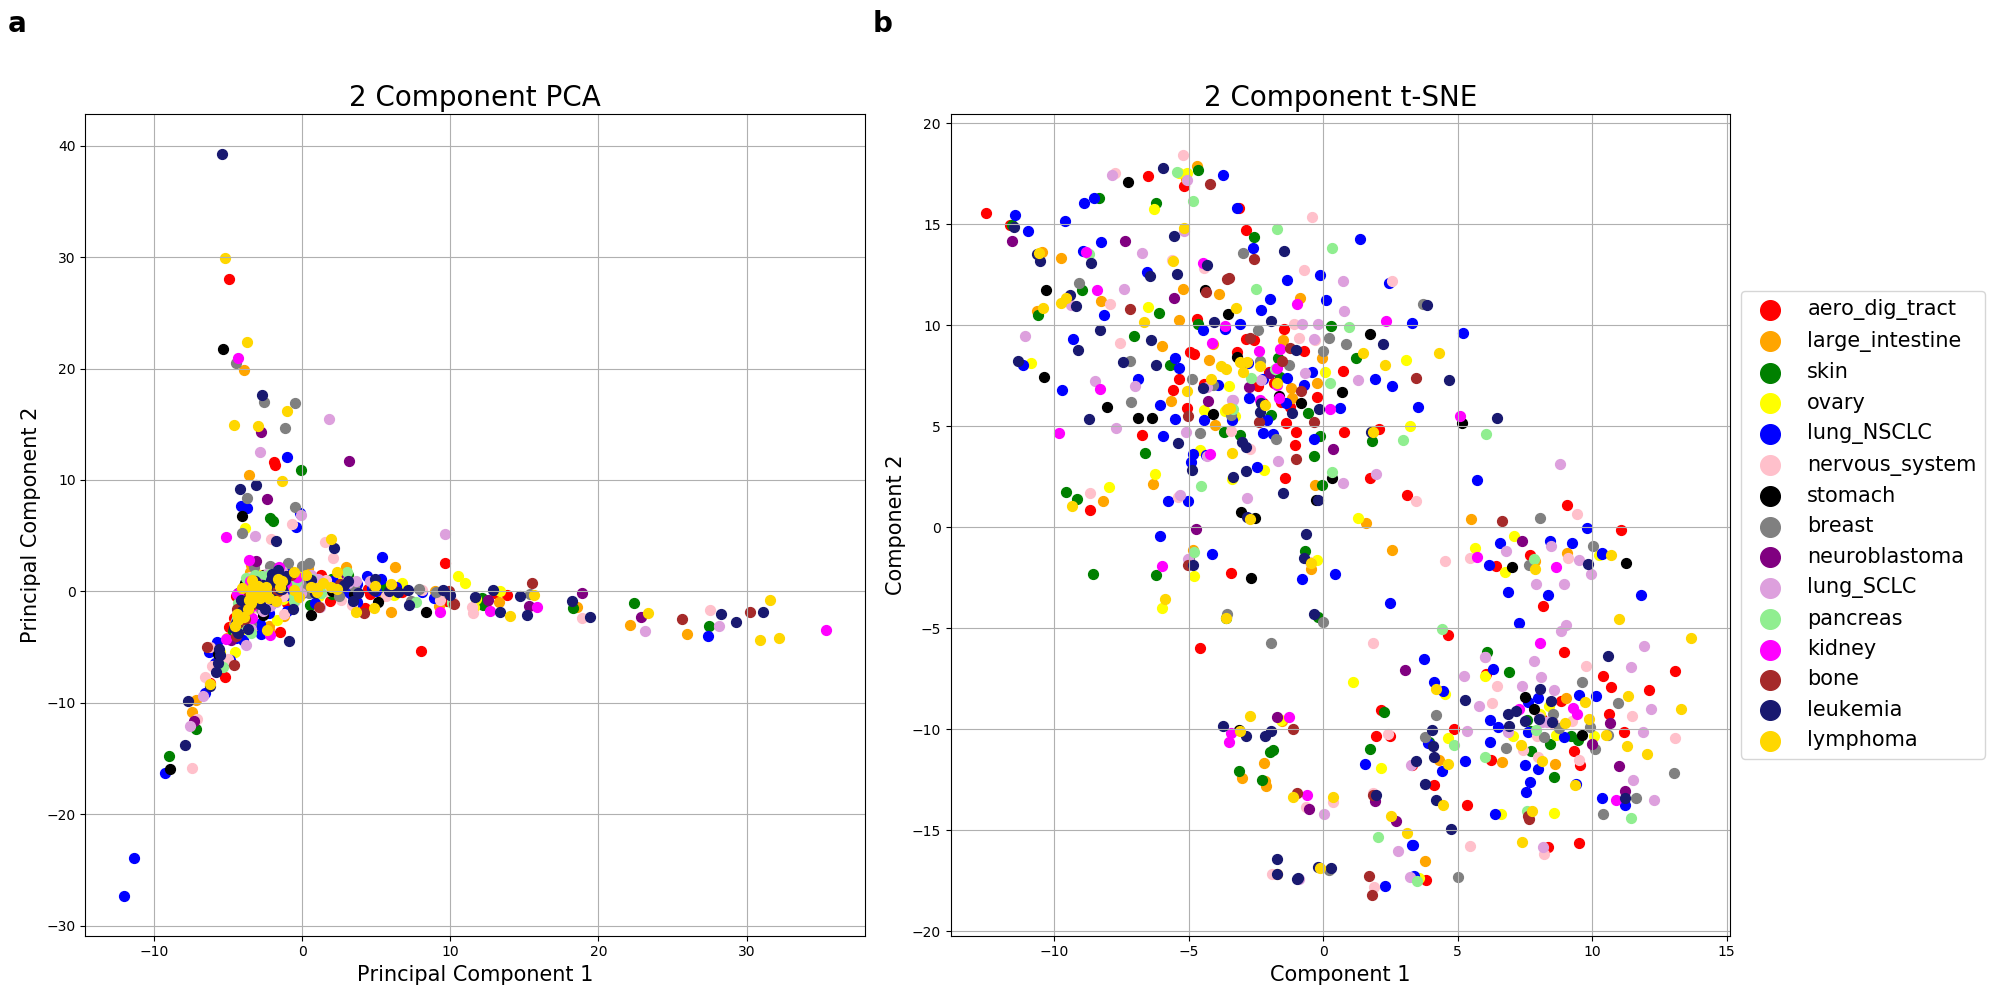

In [137]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))


ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


for tissue, color in zip(tissues,colors):
    indicesToKeep = cells_PCA['tissue'] == tissue
    ax1.scatter(cells_PCA.loc[indicesToKeep, 'principal component 1']
               ,cells_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, 
            size=20, weight='bold')
#ax1.legend(category,loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid()



ax2.set_xlabel('Component 1', fontsize = 15)
ax2.set_ylabel('Component 2', fontsize = 15)
ax2.set_title('2 Component t-SNE', fontsize = 20)


for tissue, color in zip(tissues,colors):
    indicesToKeep = cells_tsne['tissue'] == tissue
    ax2.scatter(cells_tsne.loc[indicesToKeep, 'component 1']
               ,cells_tsne.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
    
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, 
            size=20, weight='bold')
ax2.legend(tissues,loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 15, markerscale = 2)

ax2.grid()
plt.tight_layout()
plt.savefig('cellsfilter_PCA_T-sne.pdf')

In [140]:
colors = ['plum',
 'lightcoral',
 'skyblue',
 'darkviolet',
 'cornsilk',
 'lightgray',
 'floralwhite',
 'grey',
 'thistle',
 'silver',
 'sandybrown',
 'mediumseagreen',
 'dimgray',
 'mediumaquamarine',
 'darkseagreen',
 'deepskyblue',
 'darkkhaki',
 'lightsalmon',
 'moccasin',
 'firebrick',
 'rebeccapurple',
 'lightslategray',
 'lightsteelblue',
 'darkorange',
 'mediumspringgreen',
 'lavender',
 'linen',
 'green',
 'darkblue']
tissues = SNP["tissue"].unique()
N=len(tissues)

In [141]:
y = Progeny.drop(['Cell line ID', 'tissue'], axis = 1).values
y = StandardScaler().fit_transform(y)

pca = PCA(n_components = 2)
cells_transformed_pca = pca.fit_transform(y)
cells_transformed = pd.DataFrame(data = cells_transformed_pca
             , columns = ['principal component 1', 'principal component 2'])
cells_PCA = pd.concat([cells_transformed,Progeny[['tissue']]], axis = 1)

tsne = TSNE(n_components = 2)
cells_ttransformed = tsne.fit_transform(Progeny.drop(['Cell line ID', 'tissue'], axis = 1))
cells_ttransformed = pd.DataFrame(data = cells_ttransformed
             , columns = ['component 1', 'component 2'])
cells_tsne = pd.concat([cells_ttransformed, Progeny[['tissue']]], axis = 1)

<IPython.core.display.Javascript object>


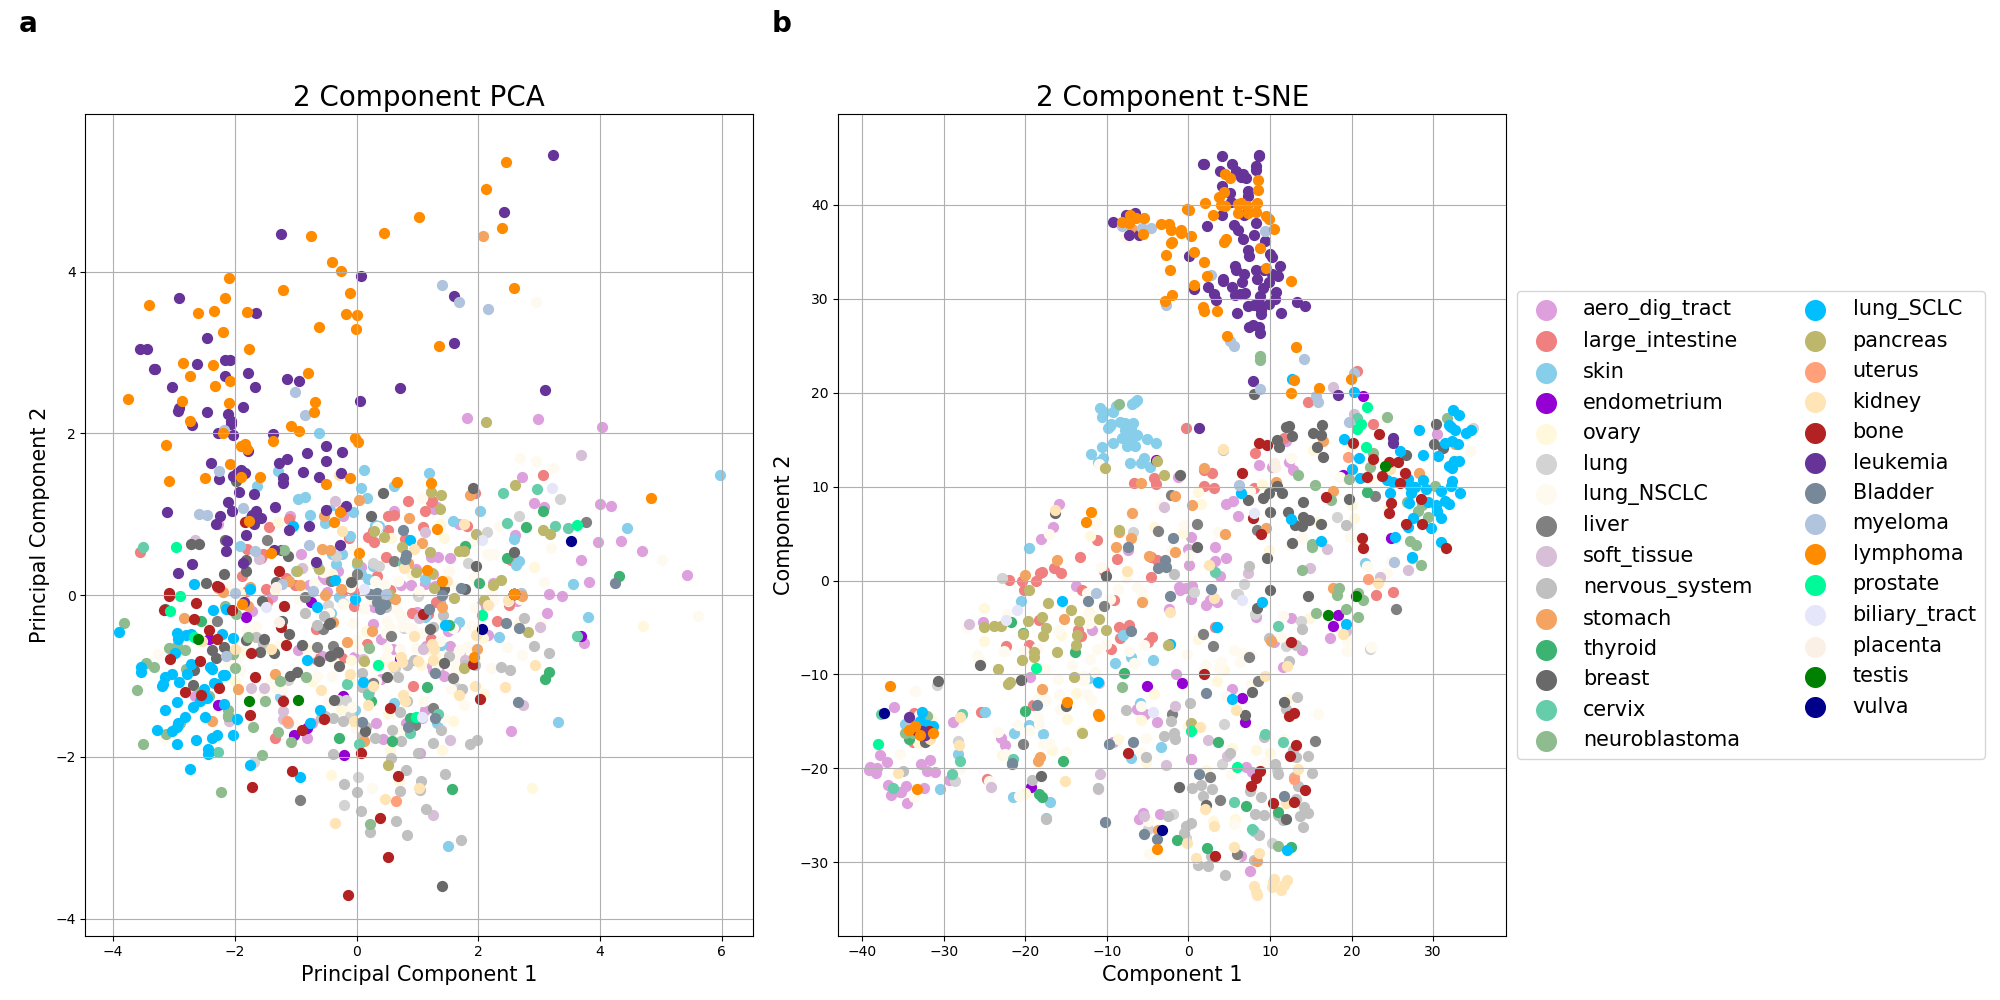

In [142]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))


ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


for tissue, color in zip(tissues,colors):
    indicesToKeep = cells_PCA['tissue'] == tissue
    ax1.scatter(cells_PCA.loc[indicesToKeep, 'principal component 1']
               ,cells_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, 
            size=20, weight='bold')
#ax1.legend(category,loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid()



ax2.set_xlabel('Component 1', fontsize = 15)
ax2.set_ylabel('Component 2', fontsize = 15)
ax2.set_title('2 Component t-SNE', fontsize = 20)


for tissue, color in zip(tissues,colors):
    indicesToKeep = cells_tsne['tissue'] == tissue
    ax2.scatter(cells_tsne.loc[indicesToKeep, 'component 1']
               ,cells_tsne.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
    
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, 
            size=20, weight='bold')
ax2.legend(tissues,loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 15, markerscale = 2,ncol=2)

ax2.grid()
plt.tight_layout()
plt.savefig('cellsProgeny_PCA_T-sne_50.pdf')